# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [3]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


## Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

**Answer:**

**PCA** will select orthogonal dimensions with highest variance. In terms of the data set at hand, this means the directions where customers had the maximum variation in annual spendings. The result will be a set of 6 orthogonal 6-D vectors with decreasing variance. For example, if we get the first principal component along [1/sqrt(2),1/sqrt(2),0,0,0,0] that would mean the sum of Fresh and Milk sales has the highest variance among all possible combinations of the 6 quantities.

In addition, some correlation relation exists among attributes that contribute to the same principal component. In the made-up example above, we can deduce that Fresh and Milk are usually bought together and hence they appear with similar lengths in the first principal component.

Going over the descriptive statistics of our data, we find that attributes with highest standard deviations are as follows:

	- Fresh, SD = 12647
	- Grocery, SD = 9503
	- Milk, SD = 7380

Therefore, we expect the first few principle components to lie along these dimensions (or a combination thereof).

By performing actual PCA, we find that first component is indeed close to the fresh direction, while second component is along the Grocery, Milk, and Detergents_Paper.

**ICA** well report a set of 6 6-D vectors along the directions of maximum statistical independence. The components are independent meaning that knowing the projection on any of the components does not give any information about the projection on other vectors, in addition, any customer sample can be explained by the sum of projections on these independent components.

The above means that the independent components reveal the underlaying latent sources driving all samples, and give an idea about the actual structure of the data. In light of the problem at hand, the independent components would reveal the different customers segments that we need to consider.


### PCA

In [4]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=data.shape[1])
pca.fit(data)

# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

**Answer:**

Variance along the first two principal components is high, it drops significantly along the third component.
I would choose the first three components which would explain more than 93% of the variance in the original data.

**3)** What do the dimensions seem to represent? How can you use this information?

**Answer:**

First component is mainly along the 'Fresh' dimension, so customers do not pay similar amounts on fresh products (another way to say that variance along the Fresh dimension is the largest). Could be that some customers sell fresh products while some sell frozen products. We notice that statistics of Fresh products has the larges std. deviation ( = 12647) among all products.

Second component is along 'Milk', 'Grocery', 'Detergents_Paper' dimensions. seems that a number of customers sell the three items together and some sell none of them.

Third component is mainly along 'Milk' and 'Frozen' dimensions, could be a difference between customers with fridges and others, but given that variance along this vector is very small, most customers agree on these values, unlike the first two principal components.

This is a rough explanation as other factors exist along above principal components.

In general, the dimensions would tell us which vectors represent the differences between the customers, and this info is very useful in differentiating between different types of customers. Basically, a direction where all customers seem to agree won't help much in differentiating between different customers types.


### ICA

In [5]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
ica = FastICA(n_components = data.shape[1])
ica.fit_transform(data)

# Print the independent components
print ica.components_ * 1e6

[[ -3.97834872   0.89740584   0.74589225   0.6698409   -2.33762622
    0.96049011]
 [  0.86197096   0.14303632  -0.77605401 -11.1474268    0.54306275
    5.97437337]
 [  0.38894929   0.22750099   0.58794644   0.50744339  -0.50767459
  -18.08731909]
 [ -0.16587986  -9.80094096   5.89992842   0.34609496  -3.64037467
    5.99374053]
 [ -0.27144092   2.52567599  11.57605713  -1.49033651 -28.04434924
   -5.71650438]
 [  0.20215499  -1.81686184   7.1773457    0.31241991  -2.5140284
   -1.77312936]]


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

**Answer:**

 - **First component**: [0.24164952  -6.58859157   4.28385556   0.85143375   6.49078937   3.26190303]
 
Customers who bought less than average Milk and lots of Grocery, Detergents, and Deli, and average of everything else. This could be indicative of large grocery stores with a deli counter.


 - **Second component**: [0.86341669   0.17817649  -0.86781197 -11.14739034   0.61841913   5.9517213 ]
 
Customers who bought much less than average Frozen products and lots of Deli, and almost average of everything else. Could be smaller grocery stores with a deli counter.

 - **Third component**: [3.96270391  -0.94611005  -0.28411353  -0.71322329   1.30423217  -1.10023843]
 
Customers who bought more Fresh products than average, and about average of everything else. This could be the group for small grocery stores or supermarkets which has no deli section.\\

 - **Fourth component**: [-0.33479516  -7.81234641   3.55607528   0.06090983  -5.18502639   5.30777666]

Customers who brought less than average Milk and Detergents\_Paper, and more than average Grocery and Deli. This could be the group of convenience stores.

 - **Fifth component**: [-0.31028354   1.07281059  13.77162459  -1.2758241  -27.2171808   -5.47709538]
 
Customers who brought much more than average Grocery and much less than average Detergents\_Paper. This is the group of large grocery stores which has no deli department.

 - **Sixth component**: [-0.38513386  -0.30973265  -0.58676198  -0.52955196   0.44955298   18.16781596]

Customers who brought much more than average Deli, and about average of everything else. Customers in this group could be deli shops.


*The above components describe the different customer segments that need to be considered, and each customer falling in one of the segments can be grouped with other customers of the same segment when studying or proposing changes affecting that group.*


## Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

### Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

**Answer:**

**K-Means clustering** clumps the customers in K groups based on a distance metric from cluster mean. This helps to identify the different types of customers and relate each customer to other customers within the same group.

Compared to hierarchical clustering, K-Means might give a center of cluster that is not itself a data point in the customers set, cluster region is isotropic around the cluster mean, and cluster sizes (in terms of number of data points) are in general more uniform.

K-means would fail exactly when its assumptions fail: when clusters shapes are irregular, and sizes of clusters are not uniform.

**Gaussian mixture model** is an EM algorithm that tries to fit Gaussian densities to the data to generate \textit{soft} clusters.

Soft clustering is useful in that it gives the probability that each point is generated by any of the n Gaussian models.

Gaussian mixture model is similar to K-means in that it is an isotropic model and hence would have issues with irregular shaped clusters. In addition, if the clusters point densities are far from Gaussian, the model might fail to produce good clusters.

In terms of complexity, GMM is a more involved algorithm as it needs to calculate the probability that each point came from any of the clusters, in addition, the model requires maximum likelihood calculation of second order statistics, hence a GMM iterations is slower than K-means.

For the case at hand, the data set contains only 440 observations (customers), which makes building the Gaussian model, and specifically computing the second order statistic prone to error due to small number of samples, even if we assume the data was indeed generated from a Gaussian mixture.

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [6]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [7]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
pca = PCA(n_components=2)
reduced_data = pca.fit(data).transform(data)
print reduced_data[:10]  # print upto 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


In [26]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'
from sklearn import metrics

clusters = KMeans(n_clusters=3).fit(reduced_data)
print clusters

labels = clusters.labels_
print 'silhouette score =',format(metrics.silhouette_score(reduced_data, labels, metric='euclidean'))

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)
silhouette score = 0.522912082404


In [27]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [28]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids = clusters.cluster_centers_
print centroids

[[  1341.31124554  25261.39189714]
 [-23978.86566553  -4445.56611772]
 [  4165.1217824   -3105.15811456]]


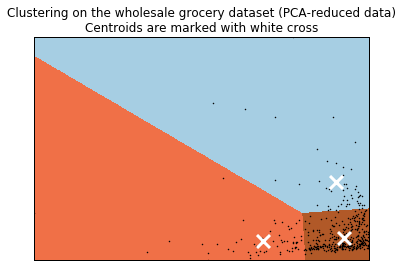

In [29]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

**Answer:**

First cluster: Customers who buy lots of "Fresh" products and about average of everything else.
Second cluster: Customers who buy lots of "Milk","Grocery", and "Detergent \ Paper" and about average of everything else.
Third cluster: Customer who buy about average of everything.

We can roughly divide the above as:
First and second clusters present large customers in the dataset, whereas third cluster present smaller customers.

Comparison of 2,3, and 4 clusters can be found in the pdf report.

### Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

**Answer:**

The last, PCA + Clustering method, gave a useful summary of different customer types which can be easily explained visually.
However, all the techniques gave some perspective into the data as explained above.

**9)** How would you use that technique to help the company design new experiments?

**Answer:**

When a new experiment is to be designed, different clusters(segments) of customers need to be studied. It is not enough to conduct an experiment within customers with large daily Fresh products transactions, as these customers might have different perspective than customers from other segments.

To succeed with multiple customer segments, one needs to cater to different segments needs separately.

To have a concrete example of the above, lets assume we plan to perform an A/B test to check whether an environmental-friendly packaging of deli products shall have a positive or negative effect on customers.

Following steps should be performed in order:

1- Find the different customer segments that are affected by the change above. From the example above, this mounts to all customers buying deli products.

2- **Within each of the segments**, pick a control group and a test group. Lets say we start with large grocery stores that have a deli counter, we pick some customers for the test group and keep the remaining customers within the segment as our control group (ie customers who won't observe the change we are testing). We do the same separately for other segments, such as deli shops.

3- We quantify the results within each segment and conclude whether we should make the change to proposal B, or stay at our current version for that segment.

In our example, a metric that can be used to measure our test success is the amount paid for deli products by group B against group A.


**10)** How would you use that data to help you predict future customer needs?

**Answer:**

Based on properties of the new customer (store size, location, popularity, types of sold products, etc..), one can map the customer to one of the clusters above, and predict the amount of different products to be requested by the customer based on other samples within the same cluster.